# Project 1

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

sat = pd.read_csv("../data/sat.csv", index_col=[0])
act = pd.read_csv("../data/act.csv", index_col=[0])

##### 2. Print the first ten rows of each dataframe.

In [103]:
sat.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [104]:
act.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


##### 3. Describe in words what each variable (column) is.

For ACT:
    The State variable represents the state in which the standardized test was taken in
    The Participation variable represents the proportion of students who took the standardized test per state
    The English variable represents the average english score per state
    The Math variable represents the average math score per state
    the Reading variable represents the average reading score per state
    the Composite variable represents the average composite score per state
For SAT:
    The State variable represents the state in which the standardized test was taken in
    The Participation variable represents the proportion of students who took the standarized test per state
    The Evidence-Based Reading and Writing variable represents the average score per state on that section
    The Math variable represents the average math score per state
    The Total variable represents the average total score per state

##### 4. Does the data look complete? Are there any obvious issues with the observations?

In [105]:
sat.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [106]:
act.describe()

,English,Math,Reading,Science,Composite
count,52.000000,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385,21.509615
std,2.332132,1.963602,2.048672,3.151113,2.002083
min,16.300000,18.000000,18.100000,2.300000,17.800000
25%,19.000000,19.400000,20.475000,19.900000,19.800000
50%,20.550000,20.900000,21.700000,21.150000,21.400000
75%,23.300000,23.100000,24.125000,22.525000,23.600000
max,25.500000,25.300000,26.000000,24.900000,25.500000


In [107]:
sat[sat['State'] == 'Maryland']

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [108]:
act[act['State'] == 'Maryland']

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


The math score for Maryland is 52 which doesn't make sense given their composite score and their reading and writing score. Also Maryland's science score does not make sense given their composite.

In [109]:
sat.loc[20,['Math']] = 524
act.loc[21,['Science']] = 23.8

In [110]:
sat.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,556.882353,1126.098039
std,45.666901,47.121395,92.494812
min,482.000000,468.000000,950.000000
25%,533.500000,523.500000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [111]:
act.describe()

,English,Math,Reading,Science,Composite
count,52.000000,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.453846,21.509615
std,2.332132,1.963602,2.048672,1.737303,2.002083
min,16.300000,18.000000,18.100000,18.200000,17.800000
25%,19.000000,19.400000,20.475000,19.975000,19.800000
50%,20.550000,20.900000,21.700000,21.300000,21.400000
75%,23.300000,23.100000,24.125000,23.200000,23.600000
max,25.500000,25.300000,26.000000,24.900000,25.500000


##### 5. Print the types of each column.

In [112]:
sat.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [113]:
act.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

##### 6. Do any types need to be reassigned? If so, go ahead and do it.

Yes, participation is an object when it'll be more useful as a float.

In [114]:
sat['Participation'] = sat['Participation'].apply(lambda x: (float(x[:-1])/100))
act['Participation'] = act['Participation'].apply(lambda x: (float(x[:-1])/100))

##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [115]:
sat_reading = {}
sat_math = {}
sat_total = {}

for i in range(0,51):
    sat_reading[sat['State'][i]] = sat['Evidence-Based Reading and Writing'][i]

for i in range(0,51):
    sat_math[sat['State'][i]] = sat['Math'][i]

for i in range(0,51):
    sat_total[sat['Total'][i]] = sat['Total'][i]
    
act_math = {}
act_science = {}
act_english = {}
act_reading = {}
act_composite = {}

for i in range(0,52):
    act_math[act['State'][i]] = act['Math'][i]
for i in range(0,52):
    act_science[act['State'][i]] = act['Science'][i]
for i in range(0,52):
    act_english[act['State'][i]] = act['English'][i]
for i in range(0,52):
    act_reading[act['State'][i]] = act['Reading'][i]
for i in range(0,52):
    act_composite[act['State'][i]] = act['Composite'][i]


##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [116]:
sat_col_names = sat.columns
act_col_names = act.columns
act_dictionary = {}
sat_dictionary = {}

for i in sat_col_names:
    sat_dictionary[i] = sat[i]

for i in act_col_names:
    act_dictionary[i] = act[i]


##### 9. Merge the dataframes on the state column.

In [117]:
sat_and_act = pd.merge(sat,act,how='inner',on='State')
sat_and_act.head()

,State,Participation_x,Evidence-Based Reading and Writing,Math_x,Total,Participation_y,English,Math_y,Reading,Science,Composite
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [118]:
sat_and_act.columns = ['State','Participation_sat','Evidence-Based_Reading_and_Writing_sat','Math_sat','Total_sat',
                    'Participation_act','English_act','Math_act','Reading_act','Science_act','Composite_act']
sat_and_act.head()

,State,Participation_sat,Evidence-Based_Reading_and_Writing_sat,Math_sat,Total_sat,Participation_act,English_act,Math_act,Reading_act,Science_act,Composite_act
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [119]:
columns = sat_and_act.columns
for col in columns:
    print(col, "Min :" , sat_and_act[col].min())
    print(col, "Max :" , sat_and_act[col].max())
    print('--------------------------')
   


State Min : Alabama
State Max : Wyoming
--------------------------
Participation_sat Min : 0.02
Participation_sat Max : 1.0
--------------------------
Evidence-Based_Reading_and_Writing_sat Min : 482
Evidence-Based_Reading_and_Writing_sat Max : 644
--------------------------
Math_sat Min : 468
Math_sat Max : 651
--------------------------
Total_sat Min : 950
Total_sat Max : 1295
--------------------------
Participation_act Min : 0.08
Participation_act Max : 1.0
--------------------------
English_act Min : 16.3
English_act Max : 25.5
--------------------------
Math_act Min : 18.0
Math_act Max : 25.3
--------------------------
Reading_act Min : 18.1
Reading_act Max : 26.0
--------------------------
Science_act Min : 18.2
Science_act Max : 24.9
--------------------------
Composite_act Min : 17.8
Composite_act Max : 25.5
--------------------------


##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [120]:
def std(df, col_names):
    sd = []
    try:
        sd = [((1/len(df[i]))*sum((df[i] - np.mean(df[i]))**2))**.5 for i in col_names]
    except:
        pass
    return sd

In [121]:
sd = std(sat_and_act,['Participation_sat','Evidence-Based_Reading_and_Writing_sat','Math_sat','Total_sat',
                  'Participation_act','English_act','Math_act','Reading_act','Science_act','Composite_act'])
sd


[0.3492907076664507,
 45.21697020437866,
 46.65713364485503,
 91.58351056778743,
 0.3182417575123181,
 2.3304876369363363,
 1.9624620273436781,
 2.0469029314842646,
 1.7361170088327353,
 2.000786081581989]

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [122]:
sat_and_act_sd = sat_and_act
sat_and_act_sd.loc[51]=['STD'] + sd

sat_and_act_sd.tail()

,State,Participation_sat,Evidence-Based_Reading_and_Writing_sat,Math_sat,Total_sat,Participation_act,English_act,Math_act,Reading_act,Science_act,Composite_act
47,Washington,0.640000,541.00000,534.000000,1075.000000,0.290000,20.900000,21.900000,22.100000,22.000000,21.900000
48,West Virginia,0.140000,558.00000,528.000000,1086.000000,0.690000,20.000000,19.400000,21.200000,20.500000,20.400000
49,Wisconsin,0.030000,642.00000,649.000000,1291.000000,1.000000,19.700000,20.400000,20.600000,20.900000,20.500000
50,Wyoming,0.030000,626.00000,604.000000,1230.000000,1.000000,19.400000,19.800000,20.800000,20.600000,20.200000
51,STD,0.349291,45.21697,46.657134,91.583511,0.318242,2.330488,1.962462,2.046903,1.736117,2.000786


In [123]:
sat_and_act.drop(51, inplace=True)
sat_and_act.tail()

,State,Participation_sat,Evidence-Based_Reading_and_Writing_sat,Math_sat,Total_sat,Participation_act,English_act,Math_act,Reading_act,Science_act,Composite_act
46,Virginia,0.65,561.0,541.0,1102.0,0.29,23.5,23.3,24.6,23.5,23.8
47,Washington,0.64,541.0,534.0,1075.0,0.29,20.9,21.9,22.1,22.0,21.9
48,West Virginia,0.14,558.0,528.0,1086.0,0.69,20.0,19.4,21.2,20.5,20.4
49,Wisconsin,0.03,642.0,649.0,1291.0,1.00,19.7,20.4,20.6,20.9,20.5
50,Wyoming,0.03,626.0,604.0,1230.0,1.00,19.4,19.8,20.8,20.6,20.2


##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [124]:
sat_and_act.sort_values(by='Participation_sat', ascending = False).head()

,State,Participation_sat,Evidence-Based_Reading_and_Writing_sat,Math_sat,Total_sat,Participation_act,English_act,Math_act,Reading_act,Science_act,Composite_act
8,District of Columbia,1.00,482.0,468.0,950.0,0.32,24.4,23.5,24.9,23.5,24.2
22,Michigan,1.00,509.0,495.0,1005.0,0.29,24.1,23.7,24.5,23.8,24.1
6,Connecticut,1.00,530.0,512.0,1041.0,0.31,25.5,24.6,25.6,24.6,25.2
7,Delaware,1.00,503.0,492.0,996.0,0.18,24.1,23.4,24.8,23.6,24.1
29,New Hampshire,0.96,532.0,520.0,1052.0,0.18,25.4,25.1,26.0,24.9,25.5


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [125]:
sat_participation_above_fifty = sat_and_act['Participation_sat'] > .50
print(sat_participation_above_fifty.head())


0    False
1    False
2    False
3    False
4     True
Name: Participation_sat, dtype: bool


In [126]:
sat_and_act_fifty = sat_and_act[sat_participation_above_fifty]
sat_and_act_fifty.head()

,State,Participation_sat,Evidence-Based_Reading_and_Writing_sat,Math_sat,Total_sat,Participation_act,English_act,Math_act,Reading_act,Science_act,Composite_act
4,California,0.53,531.0,524.0,1055.0,0.31,22.5,22.7,23.1,22.2,22.8
6,Connecticut,1.00,530.0,512.0,1041.0,0.31,25.5,24.6,25.6,24.6,25.2
7,Delaware,1.00,503.0,492.0,996.0,0.18,24.1,23.4,24.8,23.6,24.1
8,District of Columbia,1.00,482.0,468.0,950.0,0.32,24.4,23.5,24.9,23.5,24.2
9,Florida,0.83,520.0,497.0,1017.0,0.73,19.0,19.4,21.0,19.4,19.8


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

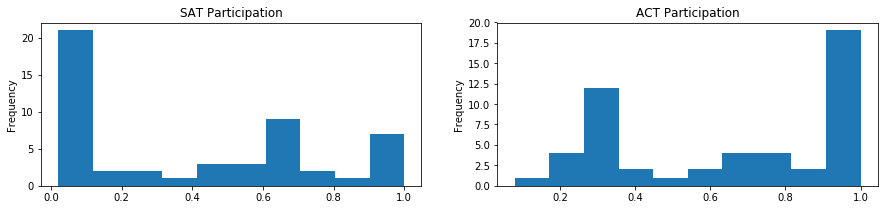

In [127]:
import matplotlib.pyplot as plt

x = sat['Participation']
y = act['Participation']

figure, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15,3))
sat_and_act['Participation_sat'].plot(ax = ax[0], title = 'SAT Participation', kind = 'hist')
sat_and_act['Participation_act'].plot(ax = ax[1], title = 'ACT Participation', kind = 'hist')




##### 17. Plot the Math(s) distributions from both data sets.

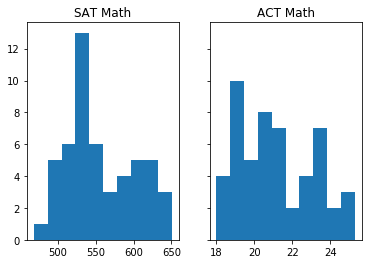

In [128]:
z = sat['Math']
w = act['Math']

fig, (axs1,axs2) = plt.subplots(1,2,sharey=True)
axs1.hist(z)
axs2.hist(w)
axs1.title.set_text('SAT Math')
axs2.title.set_text('ACT Math')

##### 18. Plot the Verbal distributions from both data sets.

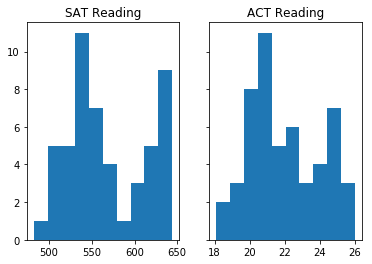

In [129]:
q = sat['Evidence-Based Reading and Writing']
r = act['Reading']

fig, (axs1,axs2) = plt.subplots(1,2,sharey=True)
axs1.hist(q)
axs2.hist(r)
axs1.title.set_text('SAT Reading')
axs2.title.set_text('ACT Reading')

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

That the data is normally distributed

##### 20. Does this assumption hold true for any of our columns? Which?

It does not appear that any of our variables are normally distributed

##### 21. Plot some scatterplots examining relationships between all variables.

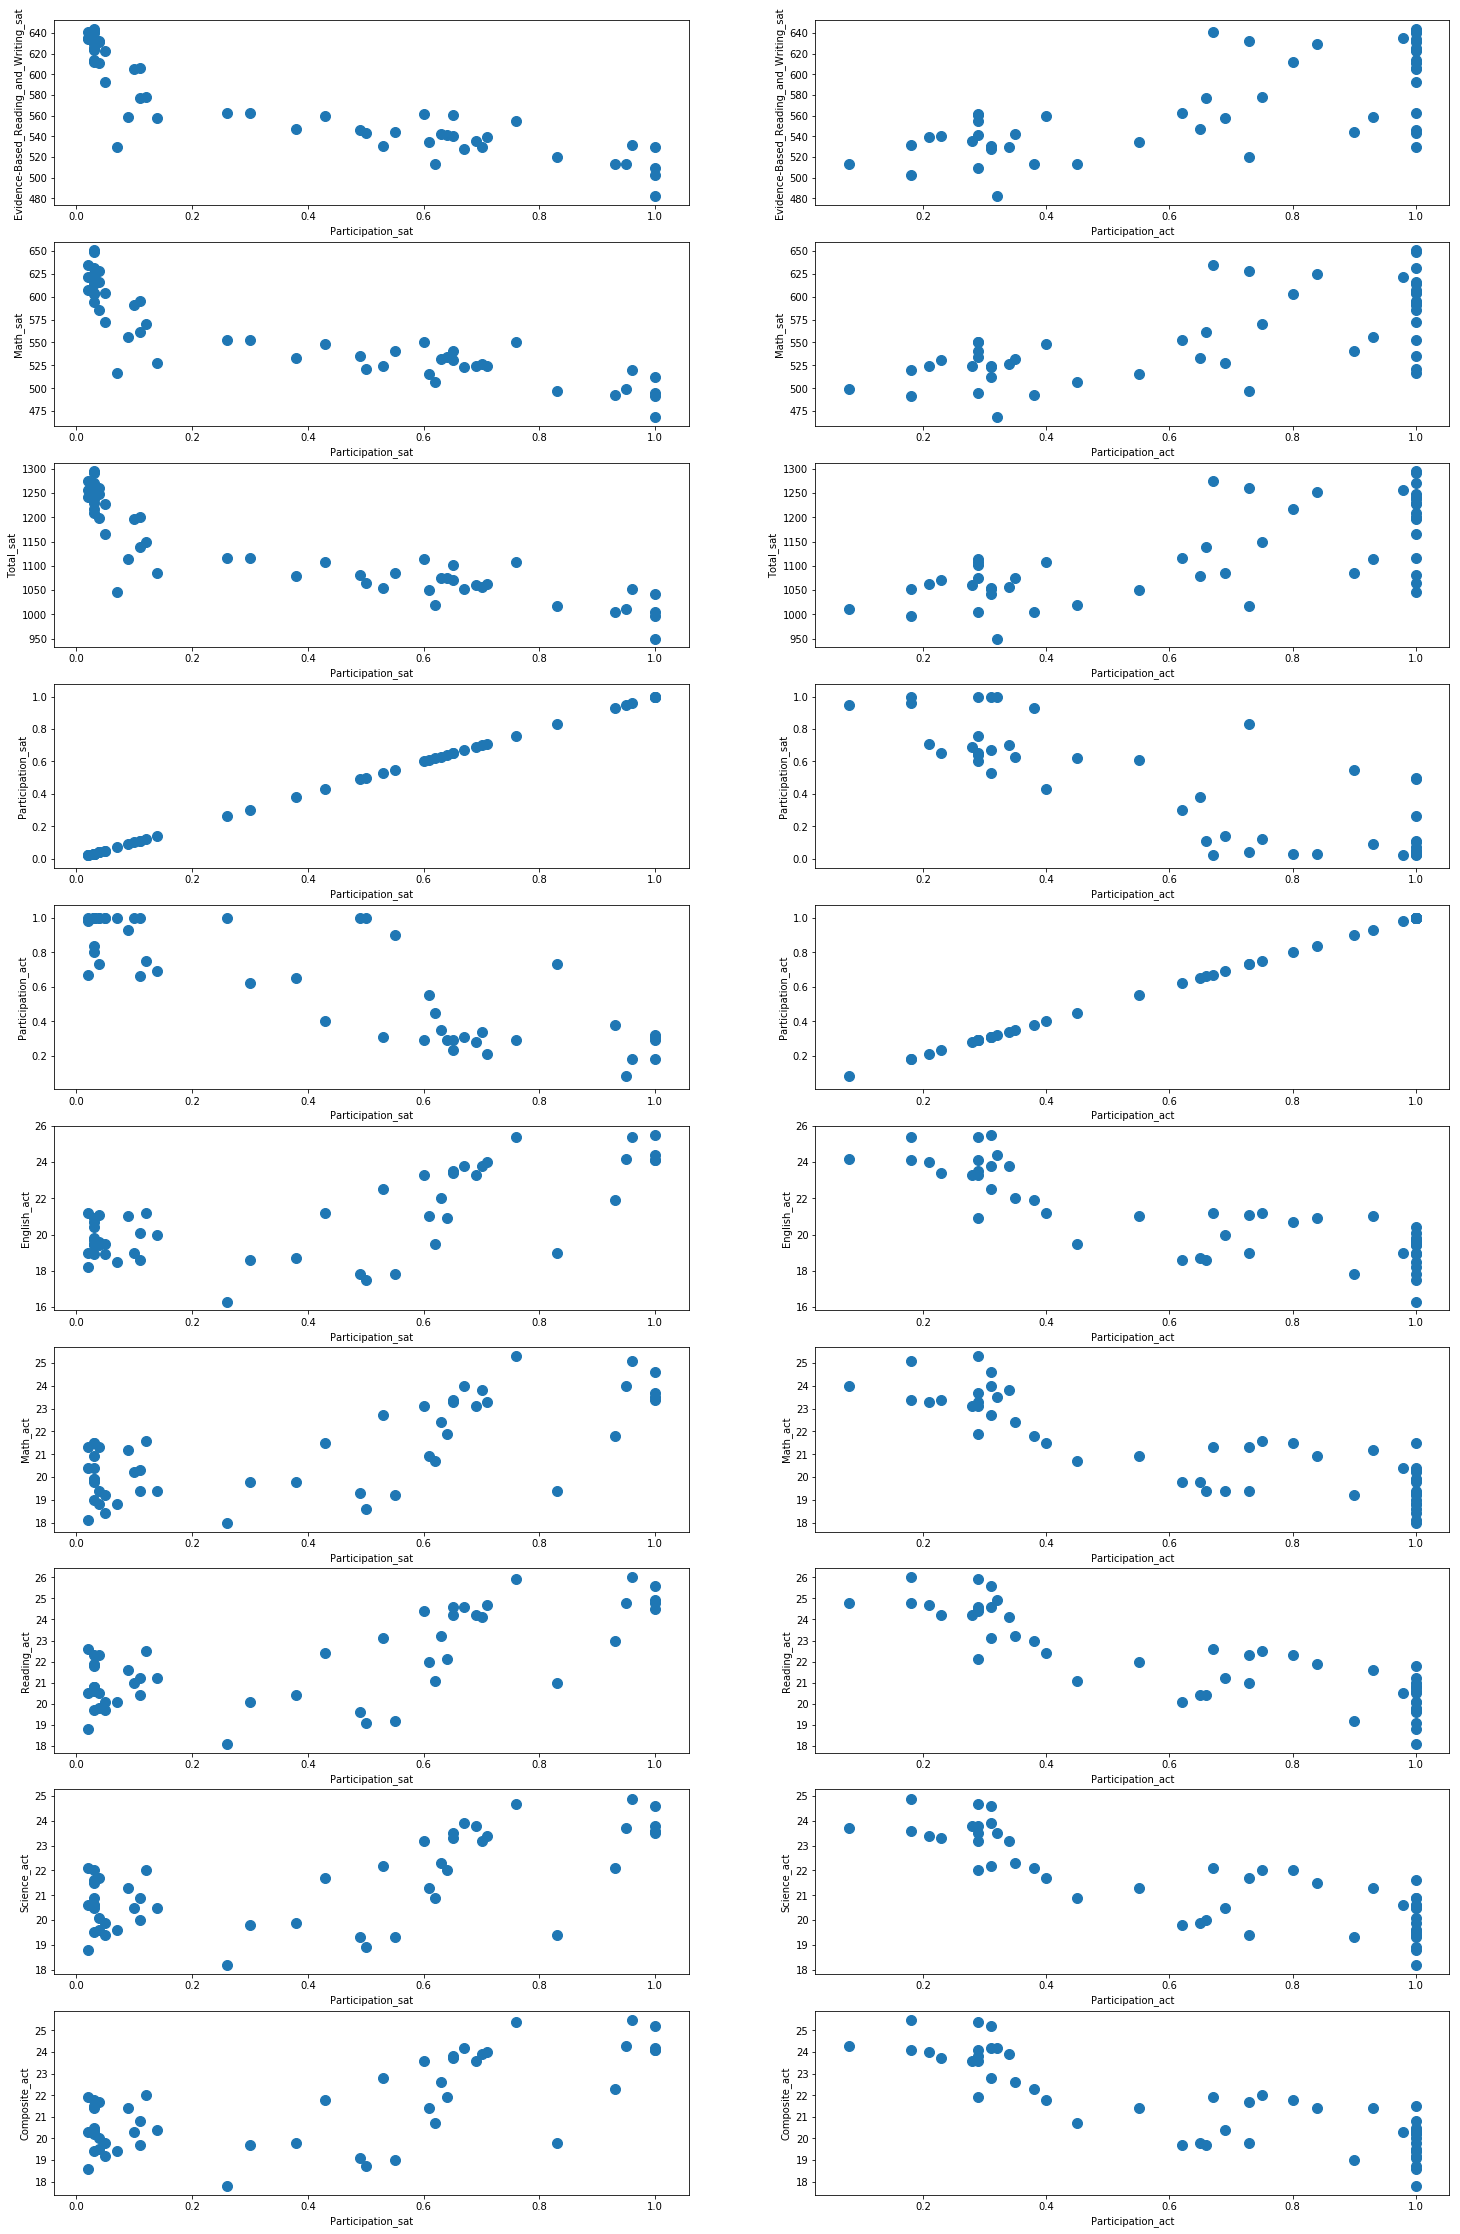

In [130]:
figure, ax = plt.subplots(nrows = 10, ncols = 2, figsize=(25, 40))

columns = ['Evidence-Based_Reading_and_Writing_sat','Math_sat','Total_sat', 'Participation_sat',
           'Participation_act','English_act','Math_act','Reading_act','Science_act','Composite_act']


for row_index, variable in enumerate(columns):
        sat_and_act.plot(ax = ax[row_index, 0], x = 'Participation_sat', y = columns[row_index], kind = 'scatter', s = 100)
        sat_and_act.plot(ax = ax[row_index, 1], x = 'Participation_act', y = columns[row_index], kind = 'scatter', s = 100)
    
#sns.pairplot(sat)

In [146]:
#plt.figure(figsize=(15,10))
#sns.regplot(data = sat_and_act, x = 'Participation_sat', y = 'Participation_act', scatter = True)
#plt.xlabel('SAT Participation', size = 20)
#plt.ylabel('ACT Participation', size = 20)
#plt.savefig('../images/scatter_participation.png')

In [147]:
#sns.regplot(data = sat_and_act, x = 'Participation_act', y = 'Composite_act', scatter = True)
#plt.savefig('../images/scatter_act_participation_composite')

In [148]:
#sns.regplot(data = sat_and_act, x = 'Participation_sat', y = 'Total_sat', scatter = True)
#plt.savefig('../images/scatter_sat_participation_total')

##### 22. Are there any interesting relationships to note?

Participation seems to be negatively correlated with the ACT total score (composite score) and also the SAT total score.
Participation ACT and Participation SAT also seem to be strongly, negatively correlated.

##### 23. Create box plots for each variable. 

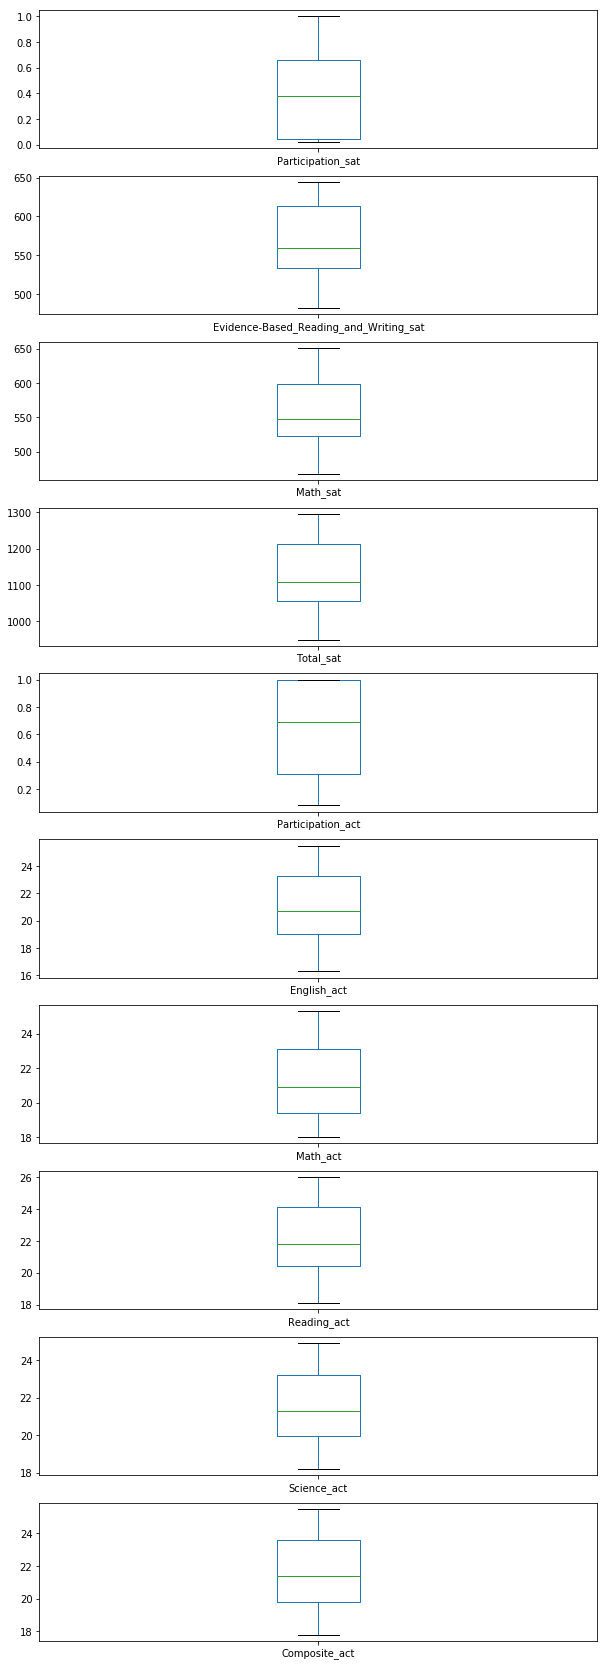

In [134]:
figure, ax = plt.subplots(nrows = 10, ncols = 1, figsize=(10, 30))
columns = ['Participation_sat','Evidence-Based_Reading_and_Writing_sat','Math_sat','Total_sat',
           'Participation_act','English_act','Math_act','Reading_act','Science_act','Composite_act']
for row_index, variable in enumerate(columns):
        sat_and_act[variable].plot(ax = ax[row_index], kind = 'box')

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

In [135]:
sat_and_act['Participation_sat'].describe()

count    51.000000
mean      0.398039
std       0.352766
min       0.020000
25%       0.040000
50%       0.380000
75%       0.660000
max       1.000000
Name: Participation_sat, dtype: float64

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


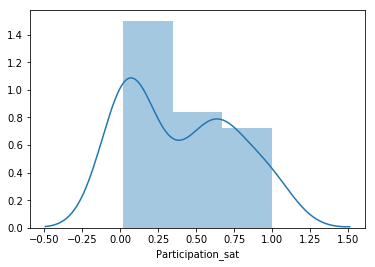

In [136]:
sns.distplot(sat_and_act.Participation_sat)

The SAT participation rate distribution (shown above) looks bimodal and slightly right skewed. It has a mean of .398 and a STD of .352766 

In [137]:
sat_and_act['Participation_act'].describe()

count    51.000000
mean      0.652549
std       0.321408
min       0.080000
25%       0.310000
50%       0.690000
75%       1.000000
max       1.000000
Name: Participation_act, dtype: float64

The ACT participation rate distribution (shown below) also looks bimodal and is slightly left skewed. It has a mean of .652 and a STD of .3214

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


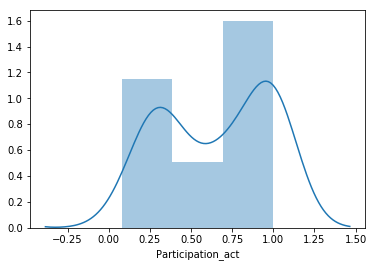

In [138]:
sns.distplot(sat_and_act.Participation_act)

In [139]:
sat['Math'].describe()

count     51.000000
mean     556.882353
std       47.121395
min      468.000000
25%      523.500000
50%      548.000000
75%      599.000000
max      651.000000
Name: Math, dtype: float64

The SAT Math distribution (shown in 17) is skewed to the left and looks unimodal. It has a mean of 547.63 and a STD of 84.9, which is fairly high.

In [140]:
act['Math'].describe()

count    52.000000
mean     21.173077
std       1.963602
min      18.000000
25%      19.400000
50%      20.900000
75%      23.100000
max      25.300000
Name: Math, dtype: float64

The ACT Math distribution (shown in 17) looks multimodal and slightly right skewed. It has a mean of 21.173 and a std of 1.96.

In [150]:
sat['Evidence-Based Reading and Writing'].describe()

count     51.000000
mean     569.117647
std       45.666901
min      482.000000
25%      533.500000
50%      559.000000
75%      613.000000
max      644.000000
Name: Evidence-Based Reading and Writing, dtype: float64

The SAT verbal distribution (shown in 18) looks bimodal and slightly right skewed. It is centered around its mean of 569.1, and has an standard deviation of about 45.6.

In [151]:
act['Reading'].describe()

count    52.000000
mean     22.001923
std       2.048672
min      18.100000
25%      20.475000
50%      21.700000
75%      24.125000
max      26.000000
Name: Reading, dtype: float64

The ACT reading distrubtion (shown in 18) looks bimodal and slightly right skewed. It is centered around its mean of 22 and has a standard deviation of 2.

##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

In [141]:
sat_and_act.corr()

,Participation_sat,Evidence-Based_Reading_and_Writing_sat,Math_sat,Total_sat,Participation_act,English_act,Math_act,Reading_act,Science_act,Composite_act
Participation_sat,1.000000,-0.874326,-0.855091,-0.867540,-0.841234,0.686889,0.710697,0.705352,0.654100,0.694748
Evidence-Based_Reading_and_Writing_sat,-0.874326,1.000000,0.987056,0.996661,0.716153,-0.461345,-0.486126,-0.488441,-0.423713,-0.470382
Math_sat,-0.855091,0.987056,1.000000,0.996822,0.682572,-0.420673,-0.420456,-0.442410,-0.367364,-0.417817
Total_sat,-0.867540,0.996661,0.996822,1.000000,0.701477,-0.441947,-0.454116,-0.466558,-0.396291,-0.445020
Participation_act,-0.841234,0.716153,0.682572,0.701477,1.000000,-0.843501,-0.861114,-0.866620,-0.837830,-0.858134
English_act,0.686889,-0.461345,-0.420673,-0.441947,-0.843501,1.000000,0.967803,0.985999,0.979082,0.990856
Math_act,0.710697,-0.486126,-0.420456,-0.454116,-0.861114,0.967803,1.000000,0.979630,0.985648,0.990451
Reading_act,0.705352,-0.488441,-0.442410,-0.466558,-0.866620,0.985999,0.979630,1.000000,0.987361,0.995069
Science_act,0.654100,-0.423713,-0.367364,-0.396291,-0.837830,0.979082,0.985648,0.987361,1.000000,0.994207
Composite_act,0.694748,-0.470382,-0.417817,-0.445020,-0.858134,0.990856,0.990451,0.995069,0.994207,1.000000


##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

$H_0$: SAT and ACT participation rates are the same

$H_A$: SAt and ACT participation rates are not the same

In [142]:
stats.ttest_ind(sat['Participation'],act['Participation'],equal_var=True)

Ttest_indResult(statistic=-3.8303821313480526, pvalue=0.0002223140576950348)

Because our resulting p-value is below our alpha value, the test shows that we have enough evidence to reject the null hypothesis in favor of the alternative hypothesis

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [143]:
print(stats.norm.interval(.95, np.mean(sat['Participation']), np.std(sat['Participation'], ddof=1)/np.sqrt(50)))
print(stats.norm.interval(.95, np.mean(act['Participation']), np.std(act['Participation'], ddof=1)/np.sqrt(50)))

(0.30025917653989787, 0.4958192548326512)
(0.5633048447391016, 0.7397720783378212)


##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

No, the confidence intervals don't overlap, which supports our answer to 26

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

No, because we don't know if everyone who took the SAT took the ACT, so they're most likely independent variables that have no effect on one another

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

No, because we only have summary data on the SAT and ACT for every state, rather than a sample of data of students' individual test scores 